In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("electric_vehicles_spec_2025.csv")

In [63]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [64]:
df.shape


(478, 22)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [66]:
df["cargo_volume_l"].unique()

array(['185', '360', '496', '472', '400', '326', '502', '520', '535',
       '526', '511', '10 Banana Boxes', '514', '350', '405', '470', '490',
       '570', '500', '525', '440', '345', '308', '552', '235', '385',
       '540', '793', '775', '1050', '310', '460', '380', '510', '603',
       '989', '390', '620', '467', '361', '572', '536', '519', '523', nan,
       '672', '228', '333', '354', '432', '503', '438', '280', '480',
       '401', '338', '466', '505', '355', '550', '839', '435', '475',
       '309', '210', '522', '316', '611', '509', '456', '410', '249',
       '363', '479', '453', '448', '151', '270', '31 Banana Boxes', '340',
       '495', '430', '645', '13 Banana Boxes', '828', '551', '1410',
       '1030', '555', '1390', '990', '300', '200', '579', '265', '386',
       '450', '468', '415', '819', '352', '516', '267', '434', '588',
       '412', '608', '471', '348', '407', '484', '446', '366', '367',
       '420', '950', '545', '585', '313', '323', '370', '630', '441',
   

In [67]:
df["cargo_volume_l"]=pd.to_numeric(df["cargo_volume_l"],errors="coerce")

In [68]:
df['cargo_volume_l'].dtype

dtype('float64')

In [69]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 4
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [70]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,474.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,493.860759,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,187.005674,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,151.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,385.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,470.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,544.500000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,1410.000000,9.000000,5908.000000,2080.000000,1986.000000


In [71]:
# fill missing values in colums
df["number_of_cells"].fillna(df["number_of_cells"].median(), inplace=True)

In [72]:
df["towing_capacity_kg"].fillna(df["towing_capacity_kg"].median(), inplace=True)

In [73]:
df=df[df["model"].notna()]

In [74]:
df["torque_nm"].fillna(df["torque_nm"].median(), inplace=True)

In [75]:
df["cargo_volume_l"].fillna(df["cargo_volume_l"].median(), inplace=True)

In [76]:
df["fast_charging_power_kw_dc"].fillna(df["fast_charging_power_kw_dc"].median(), inplace=True)

In [77]:
df=df[df["fast_charge_port"].notna()]

In [78]:
df.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 0 to 476
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      476 non-null    object 
 1   model                      476 non-null    object 
 2   top_speed_kmh              476 non-null    int64  
 3   battery_capacity_kWh       476 non-null    float64
 4   battery_type               476 non-null    object 
 5   number_of_cells            476 non-null    float64
 6   torque_nm                  476 non-null    float64
 7   efficiency_wh_per_km       476 non-null    int64  
 8   range_km                   476 non-null    int64  
 9   acceleration_0_100_s       476 non-null    float64
 10  fast_charging_power_kw_dc  476 non-null    float64
 11  fast_charge_port           476 non-null    object 
 12  towing_capacity_kg         476 non-null    float64
 13  cargo_volume_l             476 non-null    float64
 14 

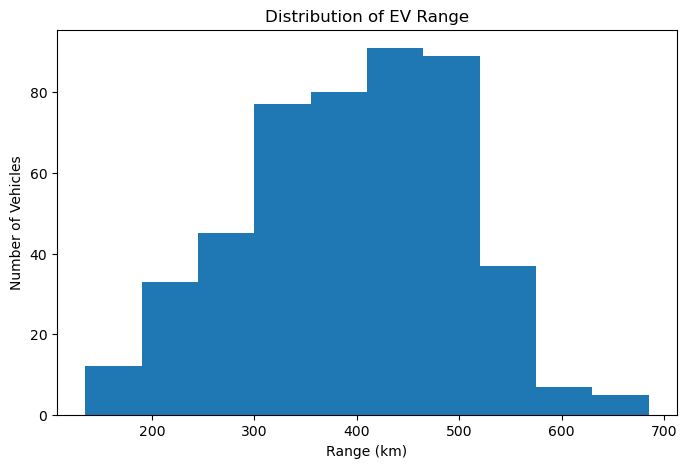

In [80]:
#histogram of range_km
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df['range_km'])
ax.set_title("Distribution of EV Range")
ax.set_xlabel("Range (km)")
ax.set_ylabel("Number of Vehicles")

plt.show()

In [81]:
df['range_km'].skew() 

-0.1636571201546916

Text(0.5, 1.0, 'Distribution of EV Range')

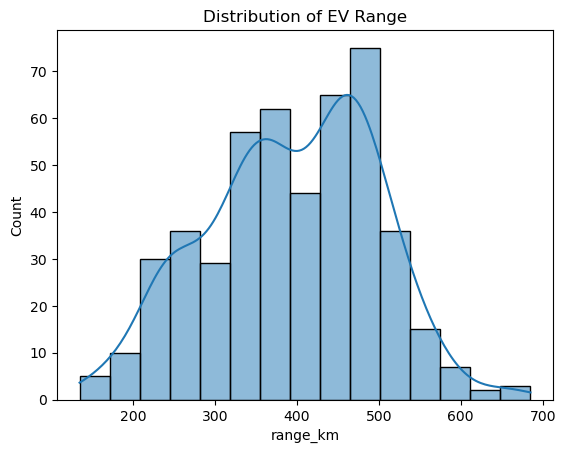

In [82]:
sns.histplot(df["range_km"], kde=True)
plt.title("Distribution of EV Range") #EV-electric vehicle

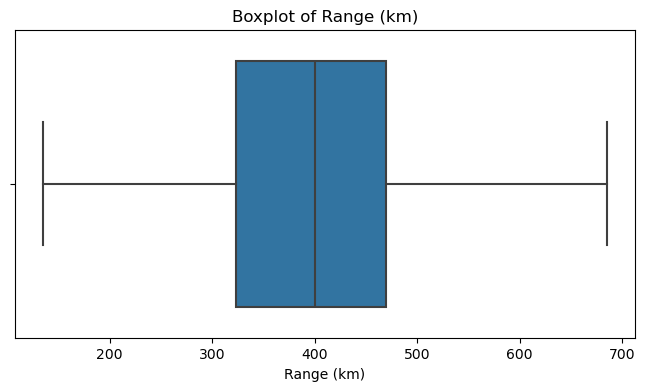

In [83]:
#boxplot for the Range column
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='range_km')  
plt.title("Boxplot of Range (km)")
plt.xlabel("Range (km)")
plt.show()

In [84]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [85]:
#function to plot box plots for numeric columns
def show_plots(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot for {col}')
            plt.xlabel(col)
            plt.tight_layout()
            plt.show()


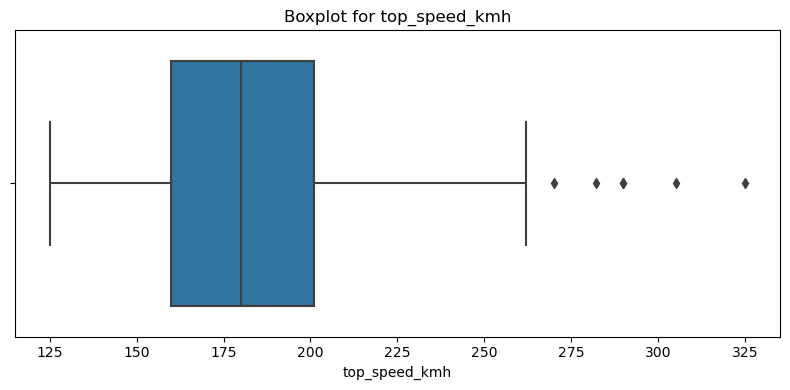

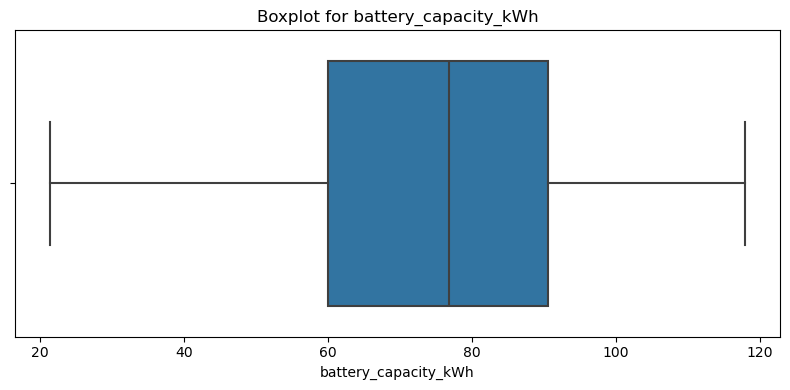

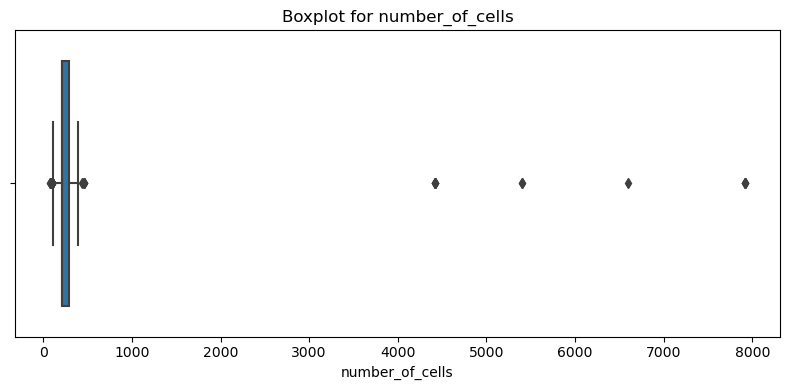

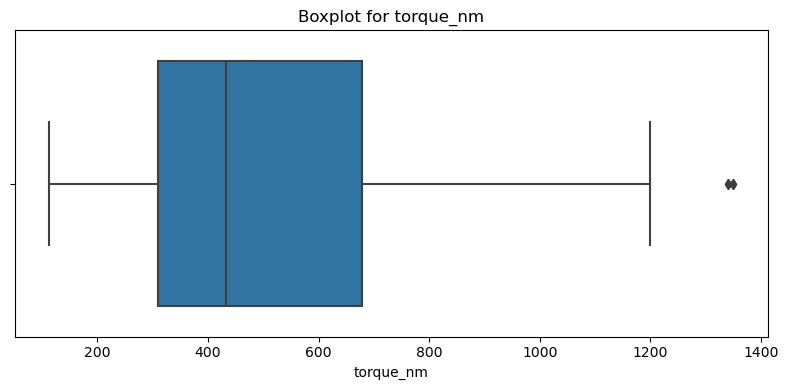

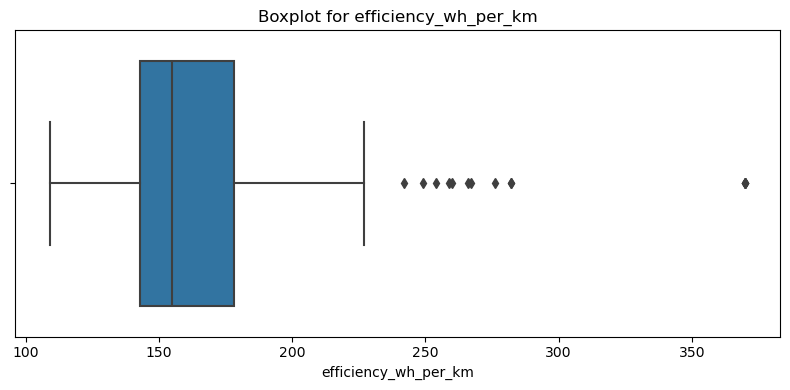

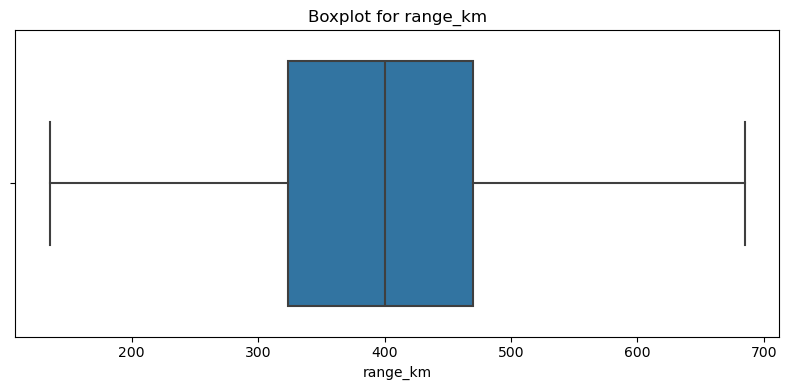

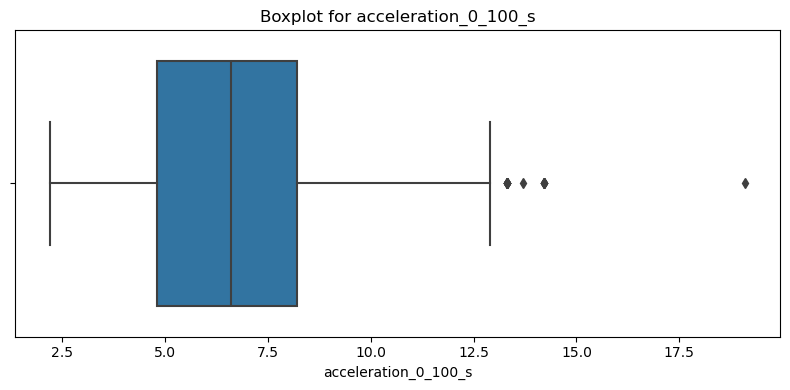

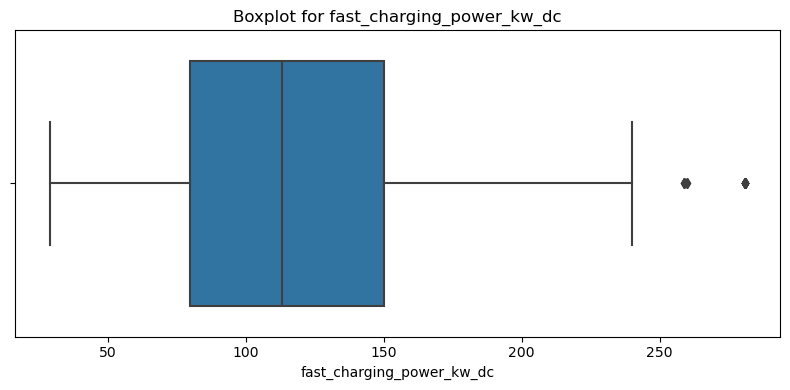

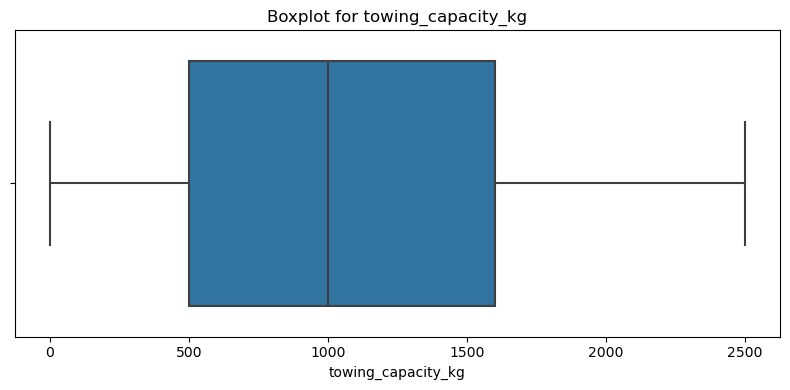

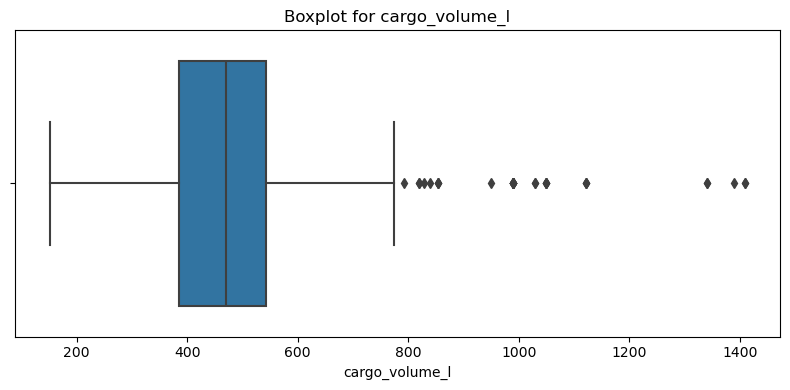

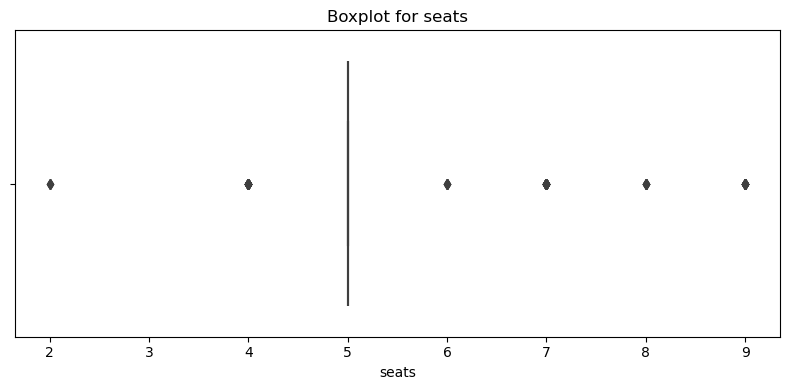

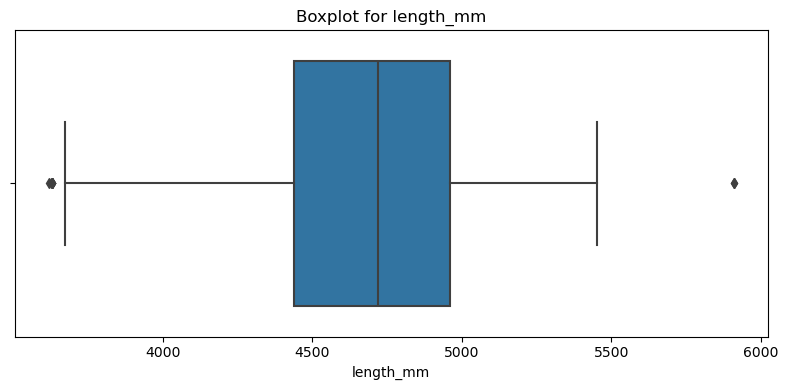

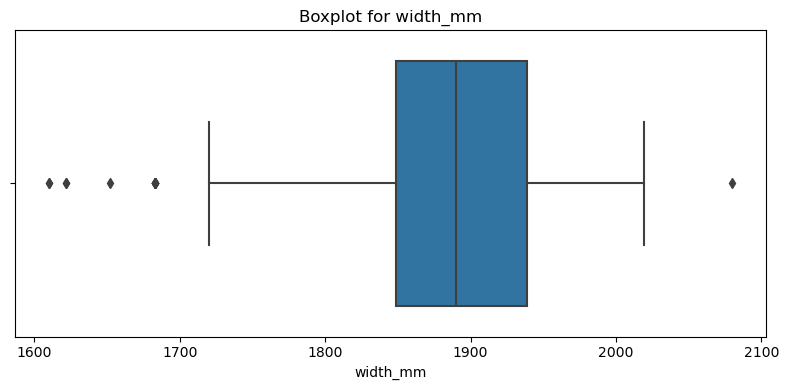

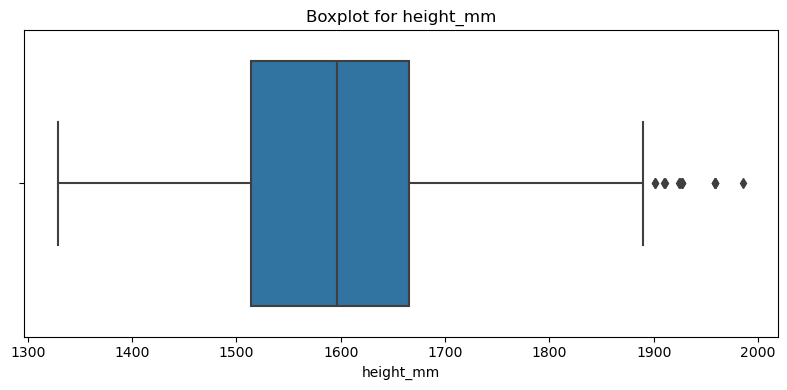

In [86]:
show_plots(df)

In [87]:
#function to plot histogram for numeric columns
def show_histograms(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))
            plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()


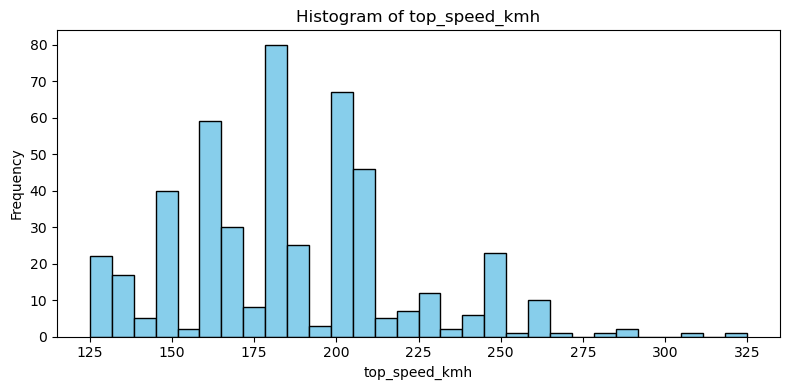

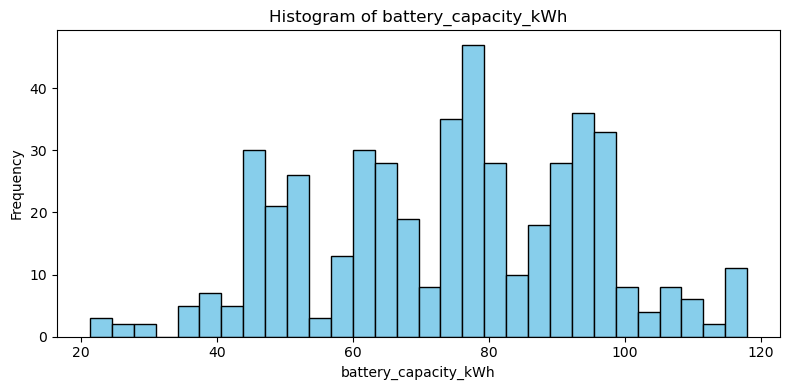

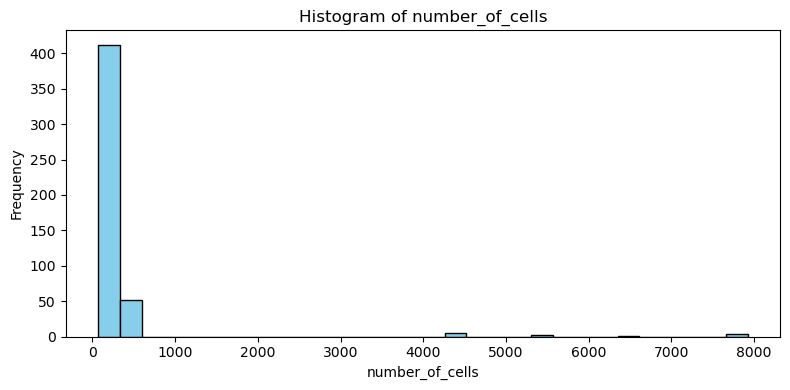

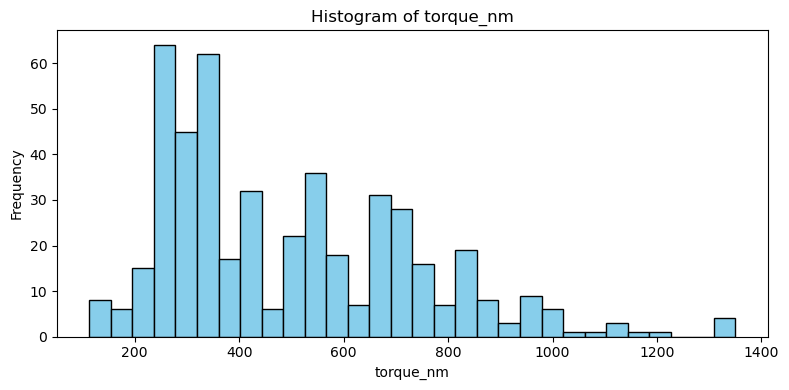

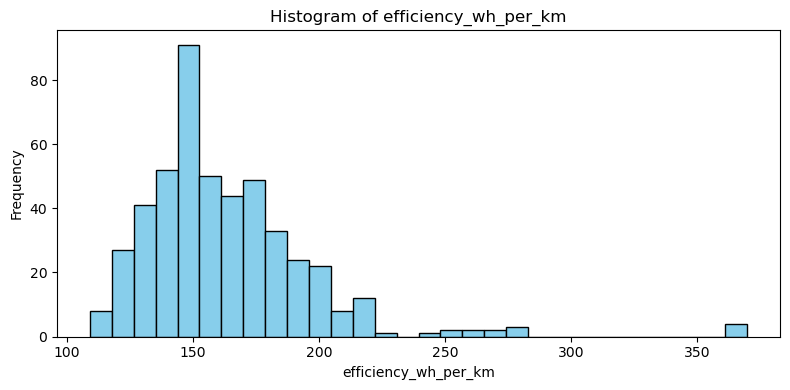

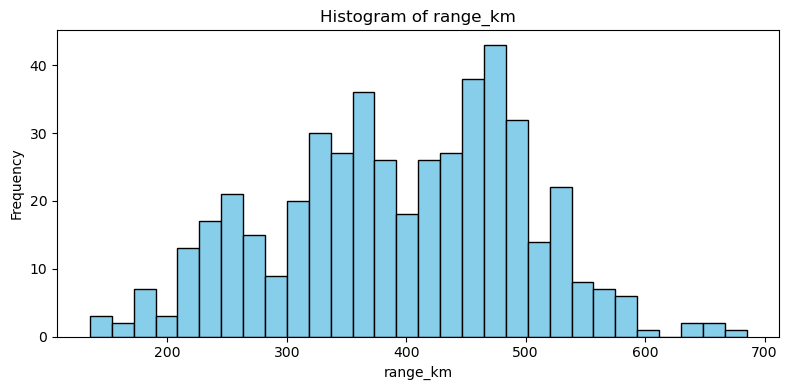

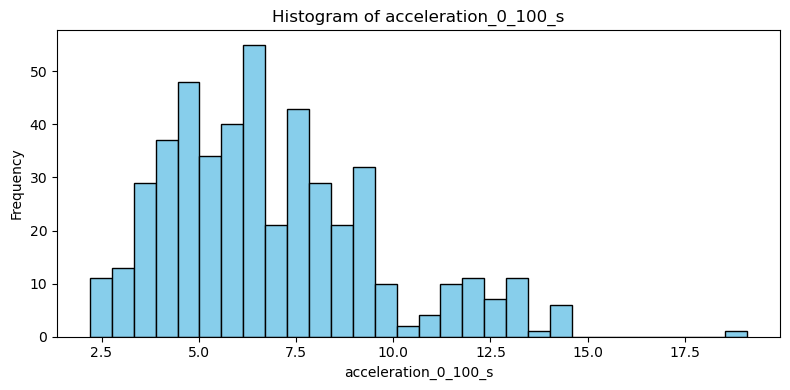

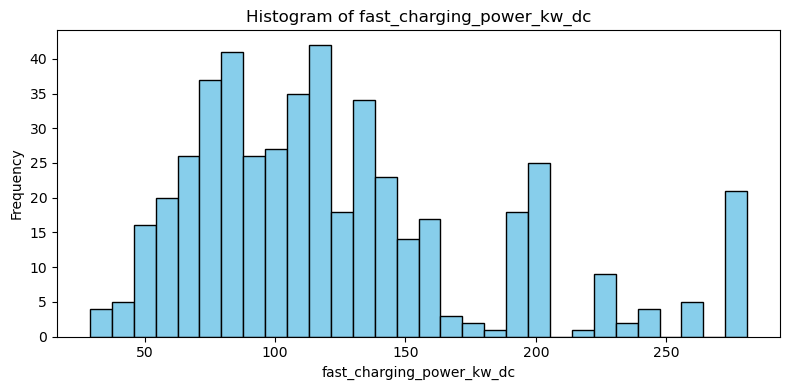

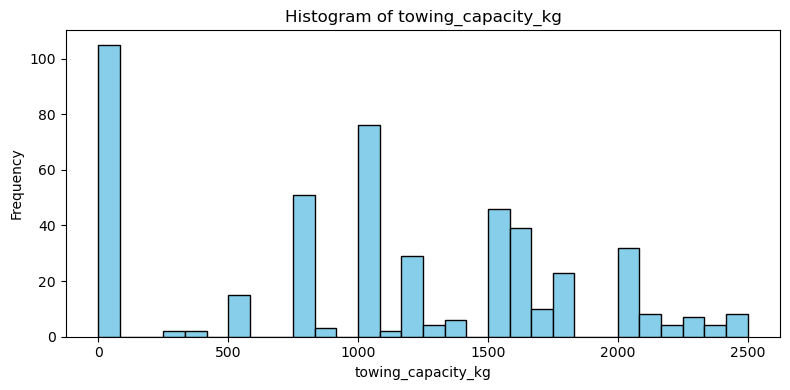

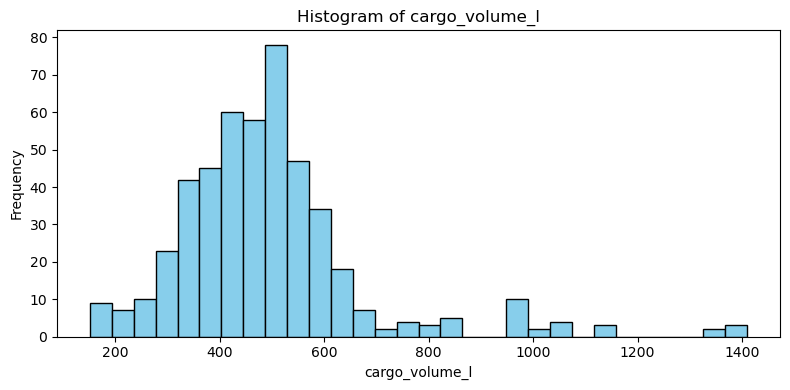

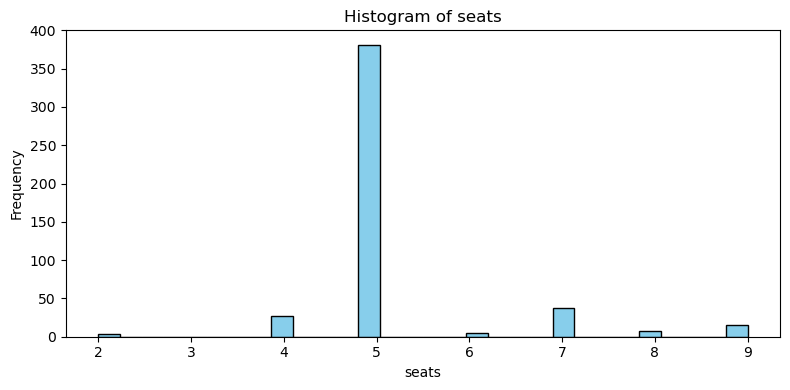

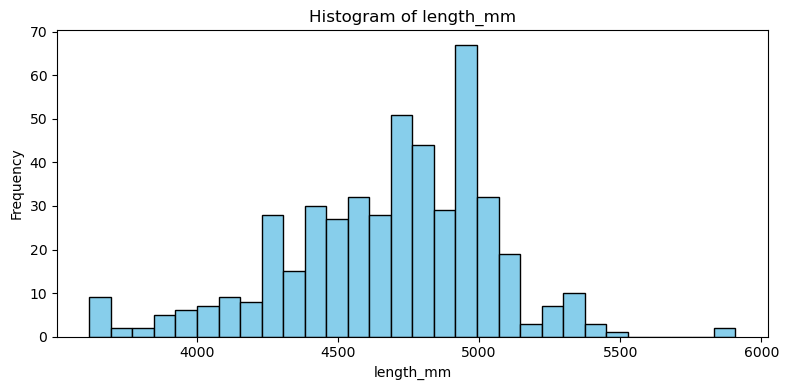

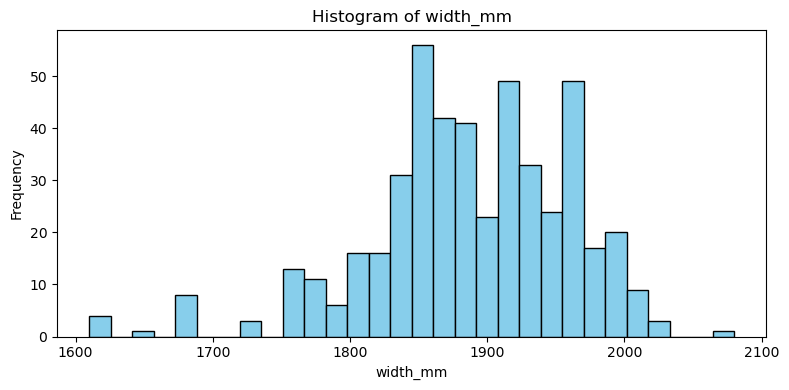

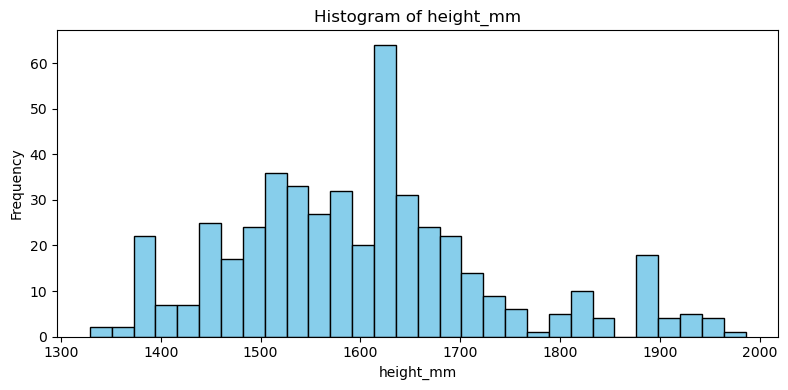

In [88]:
show_histograms(df)

In [91]:
#what brands have the longest range?
#group by brand and calculate max, then sort
brand_max_range= df.groupby("brand")["range_km"].max().sort_values(ascending=False)
brand_max_range.head(10)

brand
Mercedes-Benz    685
Lucid            665
Audi             610
Tesla            575
Porsche          575
DS               545
Volvo            530
Polestar         530
Volkswagen       525
BMW              525
Name: range_km, dtype: int64

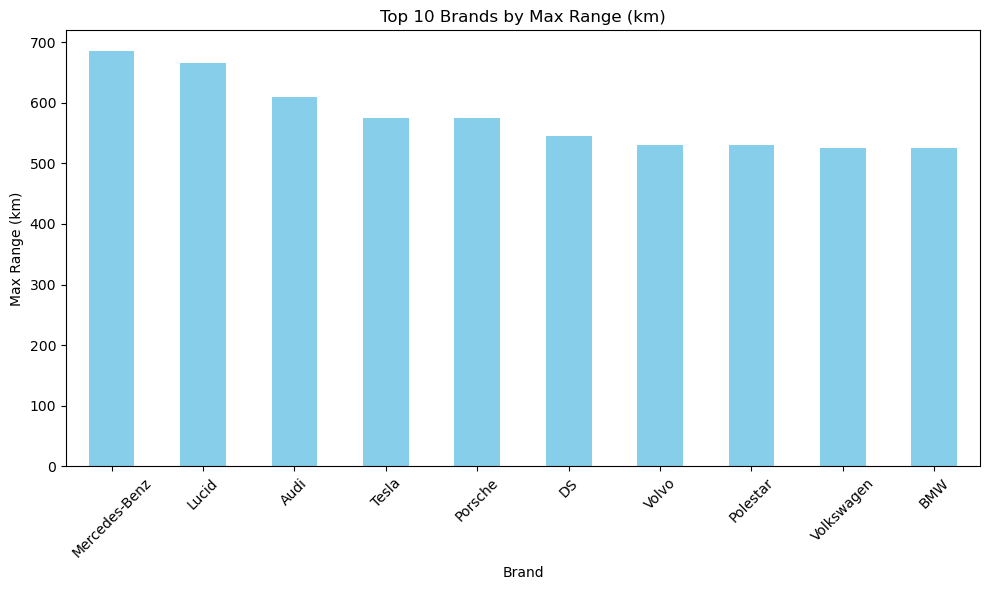

In [93]:
#bar plot for top 10 brands by max range

brand_max_range.head(10).plot(kind="bar", figsize=(10, 6), color='Skyblue')

plt.title("Top 10 Brands by Max Range (km)")
plt.ylabel("Max Range (km)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
df.columns


Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

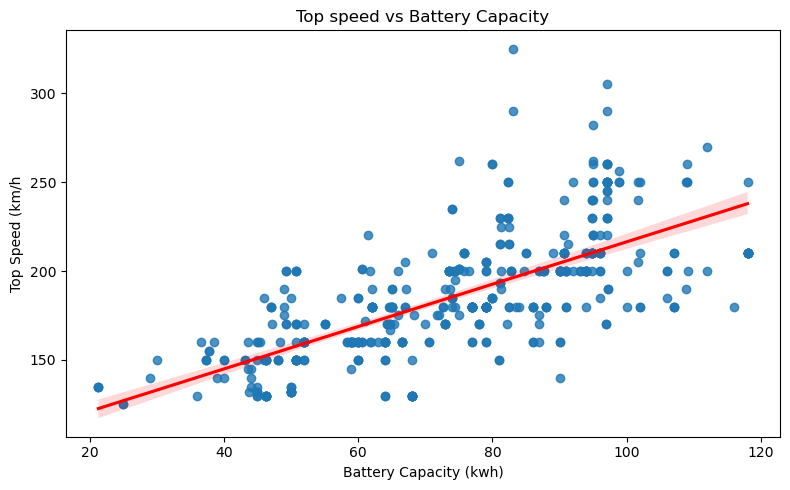

In [98]:
# does battery size relate to speed?
# scatter plot with trend
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='battery_capacity_kWh', y='top_speed_kmh', line_kws={"color": "red"})
plt.title("Top speed vs Battery Capacity")
plt.xlabel("Battery Capacity (kwh)")
plt.ylabel("Top Speed (km/h")
plt.tight_layout()
plt.show()

In [100]:
#check the correlation number,> 0.5 = strong positive relationship, 0.3–0.5 = moderate, < 0.3 = weak

corr=df["battery_capacity_kWh"].corr(df["top_speed_kmh"])
print(f"Correlation: {corr:.2f}")

Correlation: 0.71


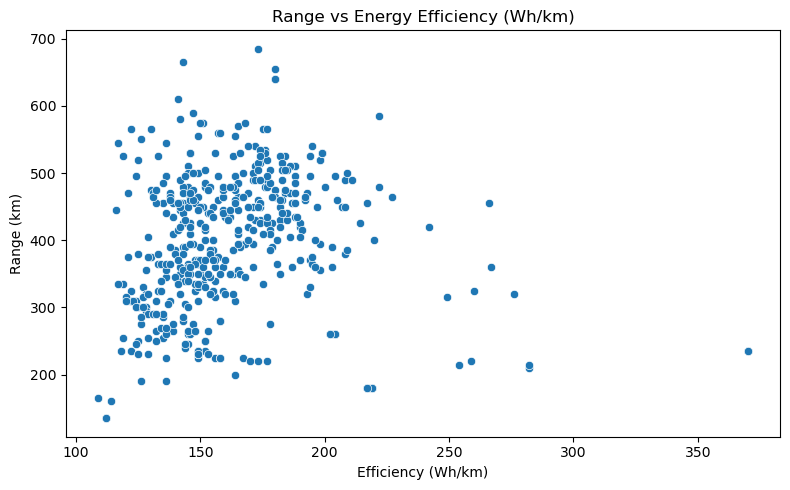

In [103]:
#How does a car's energy efficiency affect its driving range?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="efficiency_wh_per_km", y="range_km")

plt.title("Range vs Energy Efficiency (Wh/km)")
plt.xlabel("Efficiency (Wh/km)")
plt.ylabel("Range (km)")
plt.tight_layout()
plt.show()

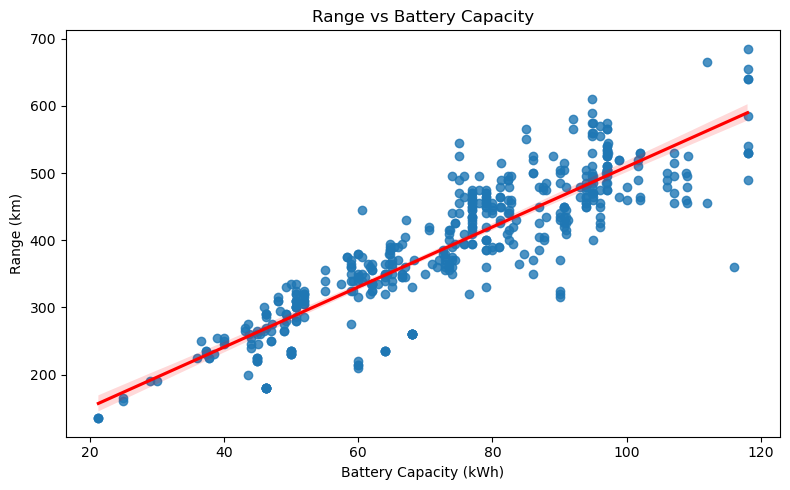

In [105]:
#how does battery capacity affect range?
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="battery_capacity_kWh", y="range_km", line_kws={"color": "red"})

plt.title("Range vs Battery Capacity")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.tight_layout()
plt.show()


In [106]:
#check the correlation number,> 0.5 = strong positive relationship, 0.3–0.5 = moderate, < 0.3 = weak
corr = df["battery_capacity_kWh"].corr(df["range_km"])
print(f"Correlation: {corr:.2f}")


Correlation: 0.88


In [107]:
#Do AWD (All-Wheel Drive) cars generally have faster acceleration (lower 0–100 km/h time) than FWD (Front-Wheel Drive) cars?
#comparing mean acceleration times by drive train
df.groupby("drivetrain")["acceleration_0_100_s"].mean()

drivetrain
AWD    4.553927
FWD    9.715484
RWD    6.877692
Name: acceleration_0_100_s, dtype: float64

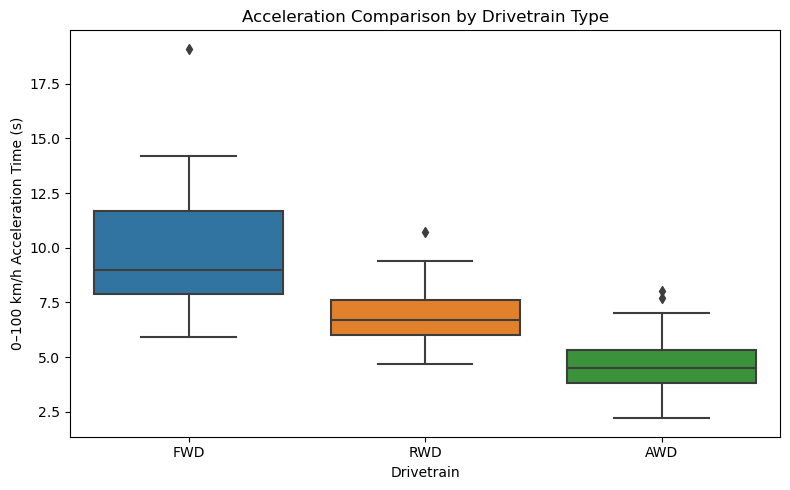

In [108]:
# boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="drivetrain", y="acceleration_0_100_s")
plt.title("Acceleration Comparison by Drivetrain Type")
plt.xlabel("Drivetrain")
plt.ylabel("0–100 km/h Acceleration Time (s)")
plt.tight_layout()
plt.show()
